# Facebook Prophet: Univariate and Multivariate Analysis

https://facebook.github.io/prophet/docs/quick_start.html

Pre-requisites:
- pystan
- prophet

In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

/Users/stevesimonson/development/tutorials/PythonforDS/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_train = pd.read_csv('../data_sets/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../data_sets/DailyDelhiClimateTest.csv')

In [3]:
len(df_train)

1462

In [4]:
len(df_test)

114

In [5]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Univariate Forecasting

In [6]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date': 'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y']) # basic log transformation to make data stationary.

# In Facebook Prophet, default to log transformation.

# only using date to predict mean temperature

In [7]:
df_train.head()
# verify y_orig preserved original meantemp data, and meantemp transformed to log and renamed 'y'

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [8]:
# Instantiate Prophet model

model = Prophet()
model.fit(df_train)

16:42:57 - cmdstanpy - INFO - Chain [1] start processing
16:42:57 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Daily prediction for the next 513 days

future_data = model.make_future_dataframe(periods=513, freq='D')
forecast_data = model.predict(future_data)

In [10]:
#forecast_data.head()
# yhat = predicted, and upper and lower ranges of prediction
forecast_data[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1970,2018-05-25,3.741451,3.490043,4.018986
1971,2018-05-26,3.738539,3.492583,4.019040
1972,2018-05-27,3.734789,3.485733,4.014600
1973,2018-05-28,3.748972,3.485460,4.011290
1974,2018-05-29,3.754522,3.501984,4.012477


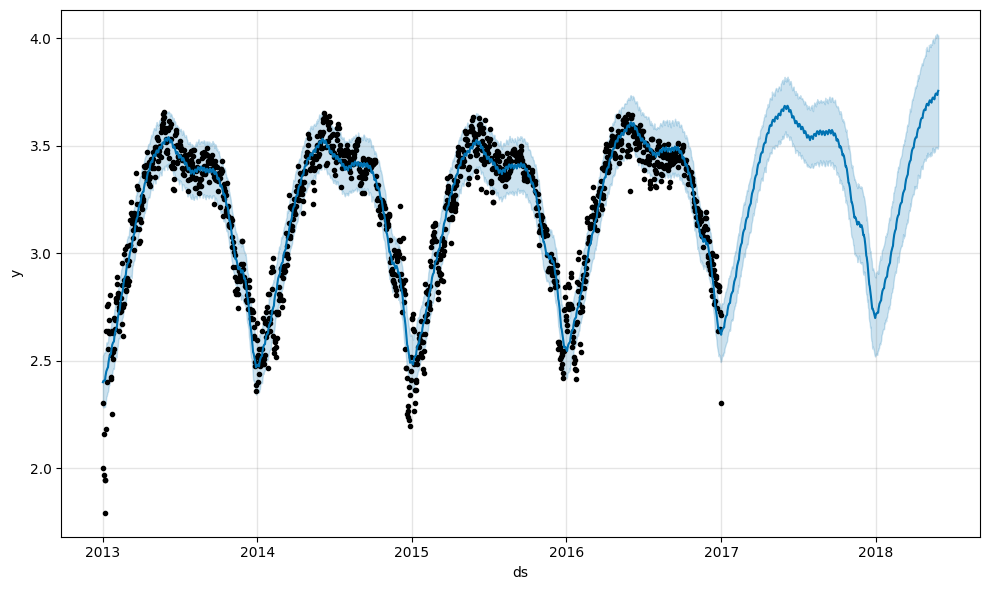

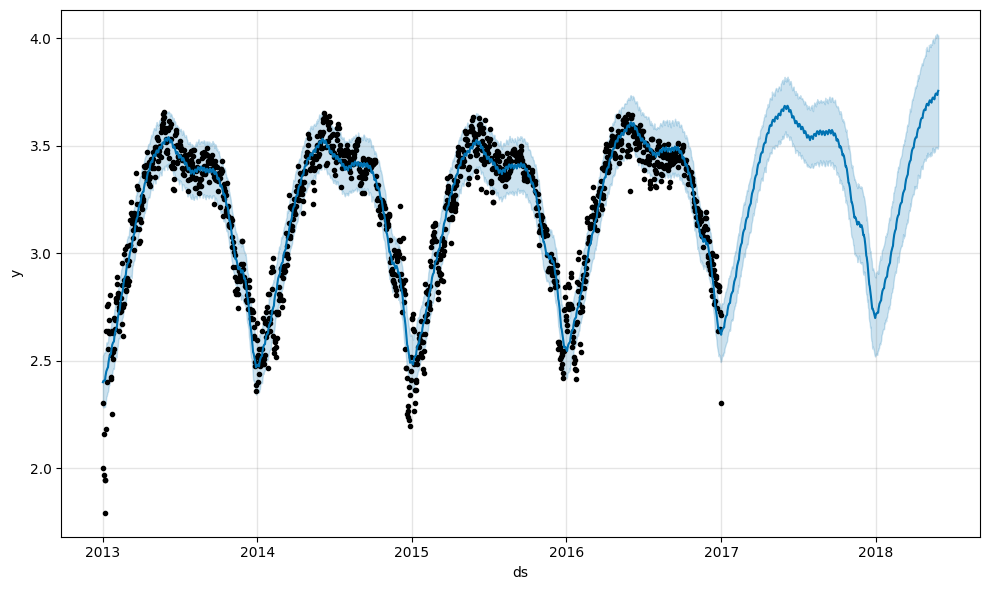

In [11]:
model.plot(forecast_data)

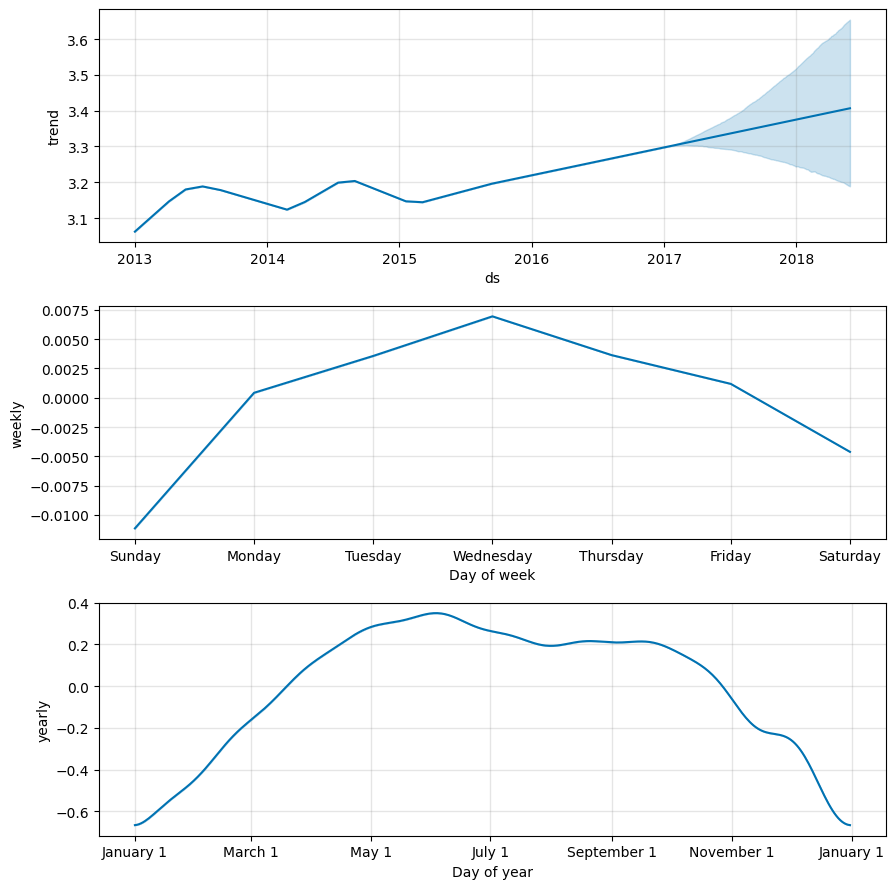

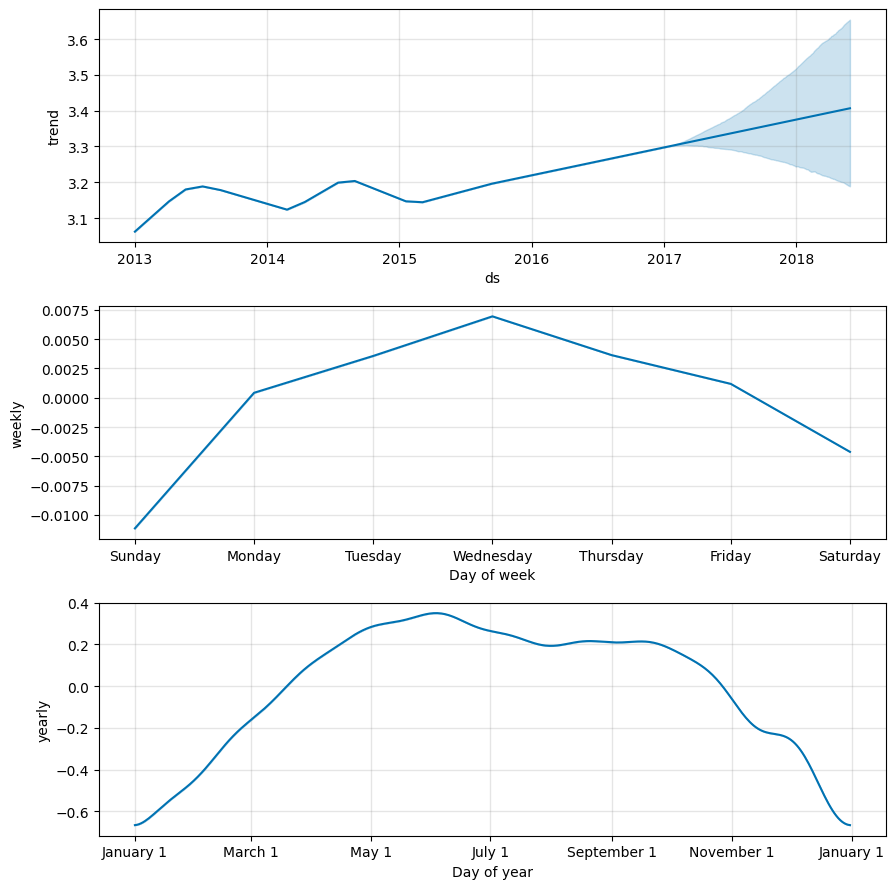

In [12]:
model.plot_components(forecast_data)

In [13]:
# Need to do inverse transformation, because current predictions are on log transformed data

forecast_data_orig = forecast_data # make sure to save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

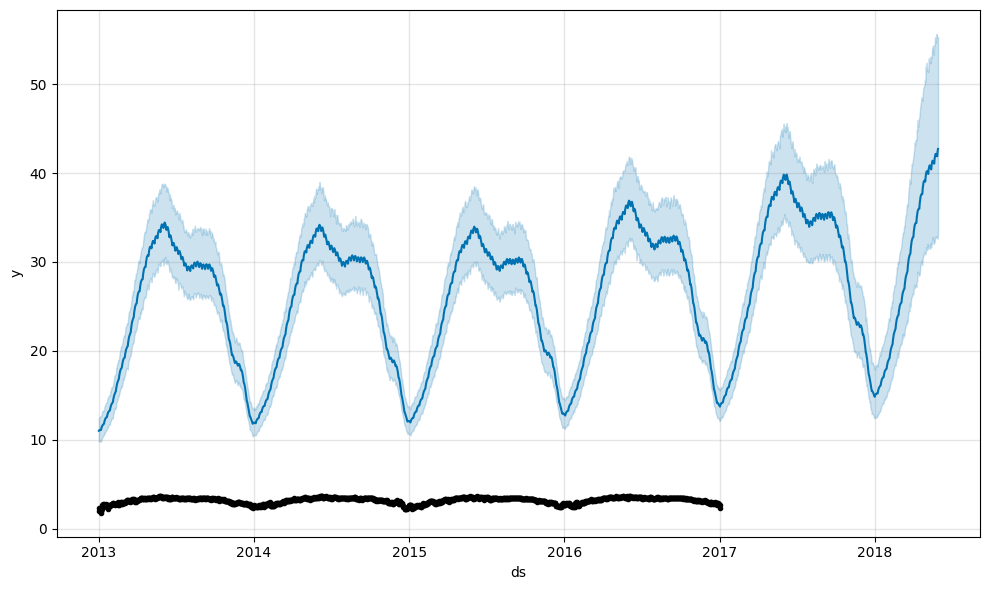

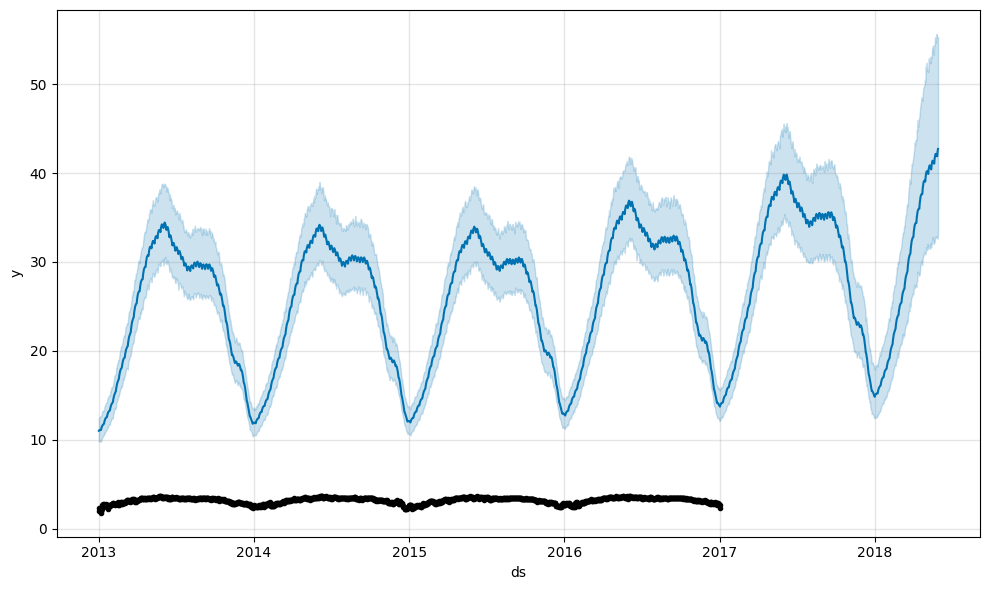

In [14]:
model.plot(forecast_data_orig)

In [15]:
# Copy the log transformed data to another column

df_train['y_log'] = df_train['y']
df_train[''] = df_train['y_orig']

In [16]:
# Plot predicted and actual line graph with X = dates and y = outbound

final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=df_train['y_orig'], name = 'Actual')
predict_chart = go.Scatter(y=final_df['yhat'], name = 'Predicted')
predict_chart_upper = go.Scatter(y=final_df['yhat_upper'], name = 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df['yhat_lower'], name = 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [17]:
# You can see the prediction does not get the sharp edges (peak and valley volatility), 
# but it gets the average pretty well.

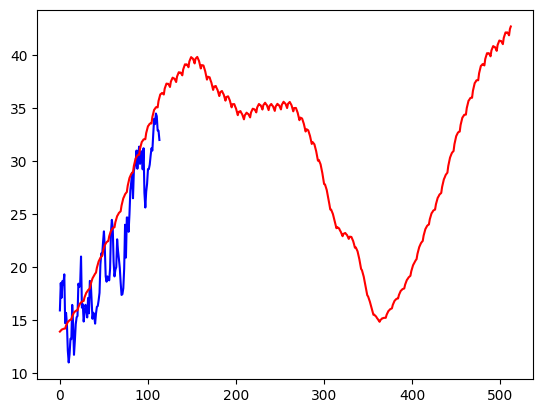

In [ ]:
# Plot testing data with the predicted data

rows = final_df['yhat'].tail(513)
rows = rows.reset_index()
rows.pop('index')

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')
plt.plot(rows, color='red')
plt.show()

## Multivariate Forecasting

In [ ]:
# Everything is the same as above, up through the logarithmic transformation

